<a href="https://colab.research.google.com/github/Souha-Kabtni/Food-Sales-Predictions-Revisited-/blob/main/Project_1_revisited_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing tools
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer,make_column_transformer,make_column_selector

# Models & evaluation metrics
from sklearn import metrics
from sklearn.linear_model import LinearRegression  # For model creation (Regression in this case)
from sklearn.tree import DecisionTreeRegressor # For model creation (Decision Tree in this case)
from sklearn.ensemble import RandomForestRegressor # For model creation (random forest Regressor in this case)

## Serialize the Best Models with Joblib
import joblib

from sklearn import set_config
set_config(transform_output='pandas')
pd.set_option('display.max_columns', 100)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # For model evaluation (using Regression metrics)

from sklearn.model_selection import GridSearchCV   # Used for model tuning

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Upload the file
from google.colab import drive
drive.mount('/content/drive')

# Read the fil with pandas
df = pd.read_csv('/content/drive/MyDrive/Coding_Dojo/Stack 2/Core assignments/sales_predictions_2023.csv')

Mounted at /content/drive


# **➿ CRISP-DM Phase 2 - Data Understanding (Data Pre-processing)**

## **Data Cleaning**

In [3]:
# General Look at the data
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


**How many rows and columns?**

In [4]:
print(f'columns : {df.shape[1]}')
print(f'rows : {df.shape[0]}')

columns : 12
rows : 8523


**✅ There are 8523 rows and 12 columns**

**What are the datatypes of each variable?**

In [5]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

**Checking for duplicated data**


In [6]:
df[df.duplicated()]

# There are no duplicate rows :)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


**✅ There are no duplicate rows**

### ❌ Finding and Fixing any inconsistent categories of data

In [7]:
# Locate my Object columns
df_types = df.dtypes
# Extract my Object columns only
str_cols = df_types[df_types=="O"]
# find the index of each
str_cols.index
str_cols = str_cols.index

for col in str_cols:
  print(f"{col}:")
  print(df[col].value_counts(dropna=False))
  print("\n\n")

Item_Identifier:
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64



Item_Fat_Content:
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64



Item_Type:
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64



Outlet_Identifier:
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT01

There are 2 columns with missing values that need to be treated:

❎ 'Item_Weight' column's missing values will be imputed with the mean of its values (as recommended by the literature)

❎ 'Outlet_Size' column's missing values will be imputed with the mode of its values (as recommended by the literature)

In [8]:
df.replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg':'Regular'},inplace=True)
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

### ❌ Finding and Fixing any impossible numerical data

In [9]:
df.describe
# There seems to be no impossible values in my numerical column :)

<bound method NDFrame.describe of      Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT04

# **➿ CRISP-DM Phase 3 - Data Preparation (Data Munging)**

## Defining X and y for the Train-Test-Split

In [10]:
y = df['Item_Outlet_Sales']
X = df.drop(columns=['Item_Outlet_Sales', 'Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year']).copy()  # Dropping the Target + 3 columns with high cardinality
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42).copy()

## Making a Preprocessing Pipeline

In [11]:
## Create categorical data selector
cat_selector = make_column_selector(dtype_include='object')

# create pipeline for handling categorical data
impute_most_freq = SimpleImputer(strategy='most_frequent')
encoder = OneHotEncoder(drop='if_binary',sparse=False)

cat_pipe = make_pipeline(impute_most_freq,encoder)

## Create numeric data selector
num_selector = make_column_selector(dtype_include='number')

# create pipeline for handling categorical data
impute_mean = SimpleImputer(strategy='mean')
scaler = StandardScaler()
num_pipe = make_pipeline(impute_mean, scaler)
num_pipe


## Combine into 1 column transformer
col_transformer = make_column_transformer( (cat_pipe,cat_selector),(num_pipe,num_selector), remainder='passthrough', verbose_feature_names_out=False)
col_transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7cd1996eea10>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7cd16271b160>)],
                  verbose_feature_names_out=False)

In [12]:
## fit column transformer and run get_feature_names_out
col_transformer.fit(X_train)
feature_names = col_transformer.get_feature_names_out()
feature_names

array(['Item_Fat_Content_Regular', 'Item_Type_Baking Goods',
       'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned',
       'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household',
       'Item_Type_Meat', 'Item_Type_Others', 'Item_Type_Seafood',
       'Item_Type_Snack Foods', 'Item_Type_Soft Drinks',
       'Item_Type_Starchy Foods', 'Outlet_Size_High',
       'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 1', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Type_Grocery Store',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3', 'Item_Weight', 'Item_Visibility',
       'Item_MRP'], dtype=object)

In [13]:
X_train_df = pd.DataFrame(col_transformer.transform(X_train),
                           columns = feature_names, index = X_train.index)
X_train_df.head()

,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Weight,Item_Visibility,Item_MRP
4776,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.817249,-0.712775,1.828109
7510,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.556340,-1.291052,0.603369
5828,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.131512,1.813319,0.244541
5327,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-1.169219,-1.004931,-0.952591
4810,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.528819,-0.965484,-0.336460


In [14]:
X_test_df = pd.DataFrame(col_transformer.transform(X_test),
                           columns = feature_names, index = X_test.index)
X_test_df.head()

,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Weight,Item_Visibility,Item_MRP
7503,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,3.310089e-01,-0.776646,-0.998816
2957,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.179892e+00,0.100317,-1.585194
7031,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,3.784469e-01,-0.482994,-1.595784
1084,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,4.213344e-16,-0.415440,0.506592
856,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-6.426567e-01,-1.047426,0.886725


# **➿ CRISP-DM Phase 4 - Modeling**

In [15]:
def evaluate_regression(model, X_train,y_train, X_test, y_test):
    """Evaluates a scikit learn regression model using r-squared and RMSE"""

    ## Training Data
    y_pred_train = model.predict(X_train)
    r2_train = metrics.r2_score(y_train, y_pred_train)
    rmse_train = metrics.mean_squared_error(y_train, y_pred_train,
                                            squared=False)

    print(f"Training Data:\tR^2= {r2_train:.2f}\tRMSE= {rmse_train:.2f}")


    ## Test Data
    y_pred_test = model.predict(X_test)
    r2_test = metrics.r2_score(y_test, y_pred_test)
    rmse_test = metrics.mean_squared_error(y_test, y_pred_test,
                                            squared=False)

    print(f"Test Data:\tR^2= {r2_test:.2f}\tRMSE= {rmse_test:.2f}")

## **1st model - Linear Regression model to predict sales**

In [16]:
# Instantiate a linear regression model
linreg = LinearRegression(fit_intercept=False)  # I removed the intercept after several trials where the intercept had, by far, the greatest coeffient  fit_intercept=False
linreg.fit(X_train_df, y_train)
evaluate_regression(linreg, X_train_df, y_train, X_test_df, y_test)

Training Data:	R^2= 0.56	RMSE= 1141.16
Test Data:	R^2= 0.56	RMSE= 1097.39


### With an R^2 value of 0.56, our Linear Regression model was able to explain around 56% of the variation in our target (R^2 train=056, R^2 test=0.566). This is a consistant model but not a great one. Our model generated very similar RMSE score for the training as well as the test set.

## Extract and visualize the coefficients that your model determined.

In [17]:
def get_coeffs_linreg(linreg, feature_names = None, sort=True,ascending=True,
                     name='LinearRegression Coefficients'):
    if feature_names is None:
        feature_names = linreg.feature_names_in_
    ## Saving the coefficients
    coeffs = pd.Series(linreg.coef_, index= feature_names)
    coeffs['intercept'] = linreg.intercept_
    if sort==True:
        coeffs = coeffs.sort_values(ascending=ascending)
    return coeffs

In [18]:
# linreg.coef_
coeffs = get_coeffs_linreg(linreg)
coeffs.head()

Outlet_Size_Medium            -2.112154e+15
Outlet_Size_Small             -2.112154e+15
Outlet_Size_High              -2.112154e+15
Outlet_Location_Type_Tier 3   -9.269944e+14
Outlet_Location_Type_Tier 1   -9.269944e+14
dtype: float64

In [19]:
def plot_coeffs(coeffs, top_n=None,  figsize=(4,5), intercept=False):
    if (intercept==False) & ('intercept' in coeffs.index):
        coeffs = coeffs.drop('intercept')

    if top_n==None:
        ## sort all features and set title
        plot_vals = coeffs.sort_values()
        title = "All Coefficients - Ranked by Magnitude"
    else:
        ## rank the coeffs and select the top_n
        coeff_rank = coeffs.abs().rank().sort_values(ascending=False)
        top_n_features = coeff_rank.head(top_n)
        plot_vals = coeffs.loc[top_n_features.index].sort_values()
        ## sort features and keep top_n and set title
        title = f"Top {top_n} Largest Coefficients"

    ## plotting top N importances
    ax = plot_vals.plot(kind='barh', figsize=figsize)
    ax.set(xlabel='Coefficient',
           ylabel='Feature Names',
           title=title)
    ax.axvline(0, color='k')

    ## return ax in case want to continue to update/modify figure
    return ax

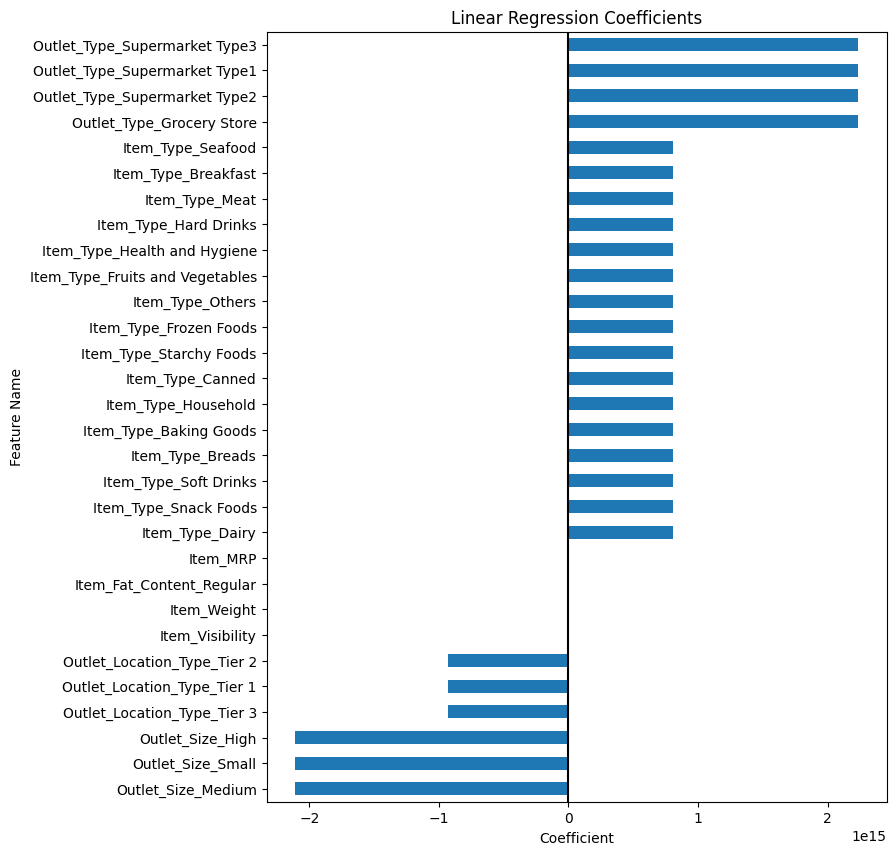

In [20]:
## Testing our function with intercept=True
ax = plot_coeffs(coeffs, figsize=(8,10))
ax.set(title='Linear Regression Coefficients', ylabel='Feature Name', xlabel='Coefficient')
fig_2 = ax.get_figure()

In [21]:
coeffs.sort_values(ascending=False)

Outlet_Type_Supermarket Type3      2.236456e+15
Outlet_Type_Supermarket Type1      2.236456e+15
Outlet_Type_Supermarket Type2      2.236456e+15
Outlet_Type_Grocery Store          2.236456e+15
Item_Type_Seafood                  8.026929e+14
Item_Type_Breakfast                8.026929e+14
Item_Type_Meat                     8.026929e+14
Item_Type_Hard Drinks              8.026929e+14
Item_Type_Health and Hygiene       8.026929e+14
Item_Type_Fruits and Vegetables    8.026929e+14
Item_Type_Others                   8.026929e+14
Item_Type_Frozen Foods             8.026929e+14
Item_Type_Starchy Foods            8.026929e+14
Item_Type_Canned                   8.026929e+14
Item_Type_Household                8.026929e+14
Item_Type_Baking Goods             8.026929e+14
Item_Type_Breads                   8.026929e+14
Item_Type_Soft Drinks              8.026929e+14
Item_Type_Snack Foods              8.026929e+14
Item_Type_Dairy                    8.026929e+14
Item_MRP                           9.859

### Due to it high coefficient value (2.874025e+16), the intercept was eliminated to better capture the impact of the other values.

### Outlet_Type_Supermarket Types 1, 2 & 3 are increased (positively impacted) outlet sales by , each.

In [22]:
# Save your figure as a .png file inside your repository (you will need this for the final piece of this assignment - Update Your README). ??

# fig_1.savefig('images/solution_core_1_coeffs.png',transparent=False, bbox_inches='tight')

## **2nd model - Regression Tree model to predict sales**

In [23]:
rf = RandomForestRegressor()
rf.fit(X_train_df, y_train)
evaluate_regression(rf, X_train_df, y_train, X_test_df, y_test)

Training Data:	R^2= 0.94	RMSE= 431.06
Test Data:	R^2= 0.54	RMSE= 1120.69


### With an R^2 value of 0.94 and 0.55 in the train set and the test test, respectively, uur RandomForestRegressor is very overfitting.

In [24]:
def get_importances(model, feature_names=None,name='Feature Importance',
                   sort=False, ascending=True):

    ## checking for feature names
    if feature_names == None:
        feature_names = model.feature_names_in_

    ## Saving the feature importances
    importances = pd.Series(model.feature_importances_, index= feature_names,
                           name=name)

    # sort importances
    if sort == True:
        importances = importances.sort_values(ascending=ascending)

    return importances

In [25]:
def plot_importance(importances, top_n=None,  figsize=(8,6)):
    # sorting with asc=false for correct order of bars
    if top_n==None:
        ## sort all features and set title
        plot_vals = importances.sort_values()
        title = "All Features - Ranked by Importance"
    else:
        ## sort features and keep top_n and set title
        plot_vals = importances.sort_values().tail(top_n)
        title = f"Top {top_n} Most Important Features"
    ## plotting top N importances
    ax = plot_vals.plot(kind='barh', figsize=figsize)
    ax.set(xlabel='Importance',
            ylabel='Feature Names',
            title=title)
    ## return ax in case want to continue to update/modify figure
    return ax

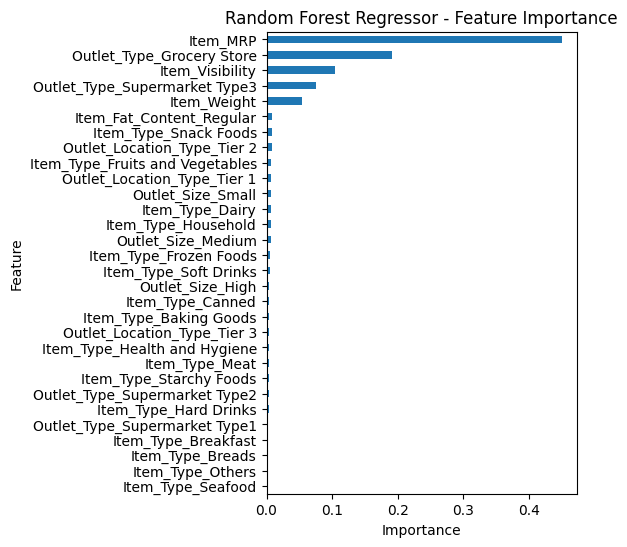

In [26]:
## Saving the feature importances
importance = get_importances(rf, sort=True, ascending=True)
ax = importance.plot(kind='barh',figsize=(4,6))
ax.set(title='Random Forest Regressor - Feature Importance', ylabel='Feature', xlabel='Importance');
fig_2 = ax.get_figure()

### The top 5 most important features are:
+ Item_MRP
+ Outlet_Type_Grocery_Store
+ Item_Visibility
+ Outlet_Type_Supermarket Type3
+ Item_Weight

In [27]:
# Save your figure as a .png file inside your repository (you will need this for the final piece of this assignment - Update Your README)
# fig_2.savefig('images/solution_core_1_importances.png',transparent=False, bbox_inches='tight')

# Serialize Your Best Models with Joblib

In [28]:
## creating a dictionary of all of the variables to save for later
export = {'preprocessor':col_transformer,
          'X_train':X_train_df,
          'X_test':X_test_df,
          'y_train': y_train,
          'y_test': y_test,
          'LinearRegression': linreg,
          'RandomForestRegressor': rf}
joblib.dump(export, 'best-models.joblib')

['best-models.joblib']

In [29]:
# Save your joblib file inside your repository. (You will work with these models again in the next core assignment.)  ??